In [2]:
%pip install scikit-image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 976.8 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 1.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
from skimage import transform, io
image = io.imread('demo.jpg', as_gray=True)
theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = transform.radon(image, theta=theta)
reconstructed = transform.iradon(sinogram, theta=theta)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/skimage/transform/radon_transform.py:75: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


# Demo

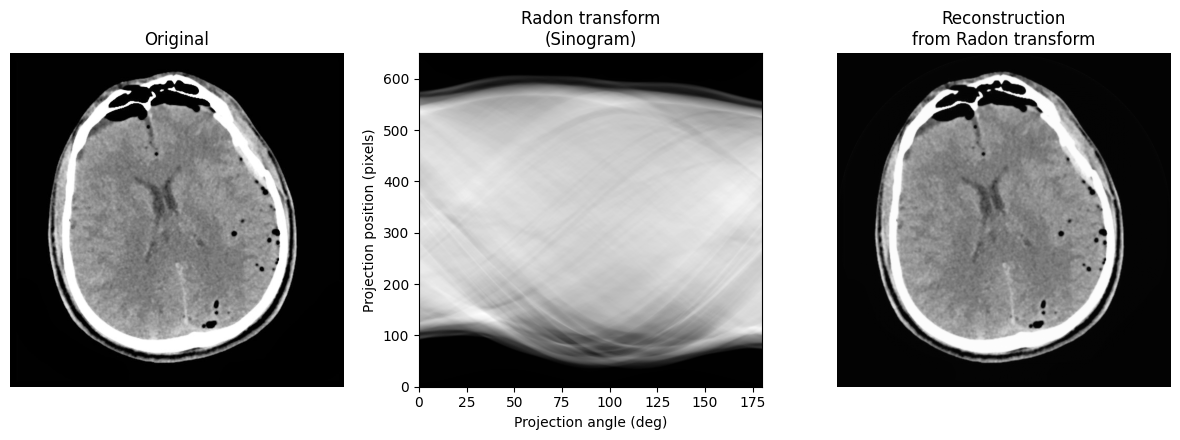

In [2]:
import matplotlib.pyplot as plt

# Modified visualization section
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4.5))

# Original image (aspect ratio preserved automatically)
ax1.set_title("Original")
original_plot = ax1.imshow(image, cmap=plt.cm.Greys_r)
ax1.axis('off')

# Calculate aspect ratios
original_aspect = image.shape[1]/image.shape[0]  # width/height
sinogram_aspect = 0.5 * (180/max(image.shape)) / (1/image.shape[0])

# Radon transform (sinogram)
ax2.set_title("Radon transform\n(Sinogram)")
sinogram_plot = ax2.imshow(
    sinogram,
    cmap=plt.cm.Greys_r,
    extent=(theta.min(), theta.max(), 0, sinogram.shape[0]),
    aspect='auto'
)

ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")

# Reconstructed image (match original aspect ratio)
ax3.set_title("Reconstruction\nfrom Radon transform")
reconstructed_plot = ax3.imshow(
    reconstructed,
    cmap=plt.cm.Greys_r,
    extent=[0, image.shape[1], image.shape[0], 0],  # Match original spatial dimensions
    aspect=1/original_aspect  # Invert aspect ratio calculation
)
ax3.axis('off')

fig.tight_layout()
plt.show()

In [5]:
# finding the SSIM
from skimage.metrics import structural_similarity as ssim
ssim_value = ssim(image, reconstructed, data_range=image.max() - image.min())
print(f"SSIM: {ssim_value:.4f}")

SSIM: 0.9768


In [6]:
# finding the PSNR
from skimage.metrics import peak_signal_noise_ratio as psnr
psnr_value = psnr(image, reconstructed, data_range=image.max() - image.min())
print(f"PSNR: {psnr_value:.4f} dB")

PSNR: 41.6493 dB


# Creating Dataset

In [12]:
import os
import numpy as np
from skimage.io import imread, imsave
from skimage.transform import radon

# Set base directory to current directory
base_dir = '.'  # Update this if your directory structure differs

# Define datasets based on your folder structure
datasets = ['FILTERED_BRAIN_CT', 'FILTERED_PANCREAS_CT']

def create_sinogram(image_path, output_path):
    """Create and save sinogram while preserving original filename"""
    try:
        image = imread(image_path, as_gray=True)
        theta = np.linspace(0., 180., max(image.shape), endpoint=False)
        sinogram = radon(image, theta=theta)
        
        # Normalize and save with same name as original
        sinogram = (sinogram - sinogram.min()) / (sinogram.max() - sinogram.min())
        imsave(output_path, (sinogram * 255).astype(np.uint8))
        return True
    except Exception as e:
        print(f"Error processing {image_path}: {str(e)}")
        return False

# Process each dataset
for dataset in datasets:
    input_folder = os.path.join(base_dir, dataset)
    output_folder = os.path.join(base_dir, f"{dataset}_SINOGRAMS")
    
    # Create output directory if needed
    os.makedirs(output_folder, exist_ok=True)
    
    print(f"Processing {dataset} with {len(os.listdir(input_folder))} images...")
    
    # Process all image files
    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            input_path = os.path.join(input_folder, filename)
            output_path = os.path.join(output_folder, filename)
            
            # Preserve original extension
            if create_sinogram(input_path, output_path):
                print(f"Created: {output_path}")
            else:
                print(f"Failed: {filename}")

print("Sinogram generation complete. Folder structure:")
os.system(f"tree {base_dir} -L 2")


Processing FILTERED_BRAIN_CT with 125 images...
Created: ./FILTERED_BRAIN_CT_SINOGRAMS/123 (7).jpg
Created: ./FILTERED_BRAIN_CT_SINOGRAMS/130 (26).jpg
Created: ./FILTERED_BRAIN_CT_SINOGRAMS/101 (24).jpg
Created: ./FILTERED_BRAIN_CT_SINOGRAMS/119 (11).jpg
Created: ./FILTERED_BRAIN_CT_SINOGRAMS/111 (9).jpg
Created: ./FILTERED_BRAIN_CT_SINOGRAMS/53 (5).jpg
Created: ./FILTERED_BRAIN_CT_SINOGRAMS/121 (16).jpg
Created: ./FILTERED_BRAIN_CT_SINOGRAMS/54 (1).jpg
Created: ./FILTERED_BRAIN_CT_SINOGRAMS/113 (2).jpg
Created: ./FILTERED_BRAIN_CT_SINOGRAMS/62 (12).jpg
Created: ./FILTERED_BRAIN_CT_SINOGRAMS/129 (1).jpg
Created: ./FILTERED_BRAIN_CT_SINOGRAMS/56 (32).jpg
Created: ./FILTERED_BRAIN_CT_SINOGRAMS/57 (32).jpg
Created: ./FILTERED_BRAIN_CT_SINOGRAMS/98 (3) - Copy - Copy.jpg
Created: ./FILTERED_BRAIN_CT_SINOGRAMS/61 (7).jpg
Created: ./FILTERED_BRAIN_CT_SINOGRAMS/110 (4).jpg
Created: ./FILTERED_BRAIN_CT_SINOGRAMS/100 (12).jpg
Created: ./FILTERED_BRAIN_CT_SINOGRAMS/101 (5).jpg
Created: ./FILTERED

0

120 (6).jpg
│   ├── 121 (16).jpg
│   ├── 122 (12).jpg
│   ├── 122 (27).jpg
│   ├── 122 (8).jpg
│   ├── 123 (15).jpg
│   ├── 123 (23).jpg
│   ├── 123 (7).jpg
│   ├── 124 (12).jpg
│   ├── 124 (17).jpg
│   ├── 125 (15).jpg
│   ├── 125 (29).jpg
│   ├── 126 (16).jpg
│   ├── 126 (28).jpg
│   ├── 126 (30).jpg
│   ├── 126 (5).jpg
│   ├── 128 (1).jpg
│   ├── 128 (15).jpg
│   ├── 129 (1).jpg
│   ├── 129 (27).jpg
│   ├── 129 (8).jpg
│   ├── 130 (14).jpg
│   ├── 130 (2).jpg
│   ├── 130 (26).jpg
│   ├── 130 (31).jpg
│   ├── 49 (1).jpg
│   ├── 49 (11).jpg
│   ├── 49 (33).jpg
│   ├── 50 (1).jpg
│   ├── 50 (38).jpg
│   ├── 50 (7).jpg
│   ├── 51 (1).jpg
│   ├── 51 (5).jpg
│   ├── 51 (50).jpg
│   ├── 52 (1).jpg
│   ├── 52 (37).jpg
│   ├── 52 (5).jpg
│   ├── 53 (2).jpg
│   ├── 53 (37).jpg
│   ├── 53 (5).jpg
│   ├── 54 (1).jpg
│   ├── 54 (17).jpg
│   ├── 54 (24).jpg
│   ├── 55 (22).jpg
│   ├── 55 (32).jpg
│   ├── 55 (6).jpg
│   ├── 56 (10).jpg
│   ├── 56 (2).jpg
│   ├── 56 (32).jpg
│   ├── 56 (33).jpg
│  